In [1]:
from IPython.display import display as print

In [2]:
# This command allows you to run `pip install <package>` within a Jupyter Notebook
import sys
!{sys.executable} -m pip install --quiet "gwosc" "gwpy" "matplotlib" "numpy<=1.23" "pycbc" "ligo.skymap" "pesummary>=0.13.2" "pepredicates" "p_astro"

In [3]:
import matplotlib.pyplot as plt
import pesummary
from pesummary.io import read
import h5py
import numpy as np
import os 
%matplotlib inline
%config InlineBackend.figure_format='retina'

/home/hoitim.cheung/.local/lib/python3.9/site-packages/gwpy/time/__init__.py:36: UserWarning: Wswiglal-redir-stdio:

SWIGLAL standard output/error redirection is enabled in IPython.
This may lead to performance penalties. To disable locally, use:

with lal.no_swig_redirect_standard_output_error():
    ...

To disable globally, use:

lal.swig_redirect_standard_output_error(False)

Note however that this will likely lead to error messages from
LAL functions being either misdirected or lost when called from
Jupyter notebooks.

To suppress this warning, use:

import warnings
warnings.filterwarnings("ignore", "Wswiglal-redir-stdio")
import lal

  from lal import LIGOTimeGPS


## This notebook - the parameter estimation data release

In [4]:
from gwosc.datasets import find_datasets
events = find_datasets(type='event', match="GW", segment=[1238166018, 1269363618])

In [14]:
events = [item for item in events if item.endswith("v1")]

## Downloading the data

H5 data sets:
['C01:IMRPhenomNSBH:HighSpin', 'C01:IMRPhenomNSBH:LowSpin', 'C01:IMRPhenomXPHM:HighSpin', 'C01:IMRPhenomXPHM:LowSpin', 'C01:Mixed', 'C01:Mixed:NSBH:HighSpin', 'C01:Mixed:NSBH:LowSpin', 'C01:SEOBNRv4PHM', 'C01:SEOBNRv4_ROM_NRTidalv2_NSBH:HighSpin', 'C01:SEOBNRv4_ROM_NRTidalv2_NSBH:LowSpin', 'history', 'version']


2024-10-20  14:23:42 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
2024-10-20  14:23:42 PESummary WARNING : Tidal deformability parameters found in the posterior table but they are all exactly 0. Assuming this is a BBH system.
2024-10-20  14:23:42 PESummary WARNING : Posterior samples for lambda_1 and lambda_2 found in the posterior table but lambda_1 is always exactly 0. Assuming this is an NSBH system.
2024-10-20  14:23:42 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
2024-10-20  14:23:42 PESummary WARNING : Tidal deformability parameters found in the posterior table but they are all exactly 0. Assuming this is a BBH system.
2024-10-20  14:23:42 PESummary WARNING : Posterior samples for lambda_1 and lambda_2 found in the posterior table but lambda_1 is always exactly 0. Assuming this is an NSBH system.
2024-10-20  14:23:42 P

H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:24:03 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:24:39 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:25:57 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:26:28 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:26:46 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:27:09 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
2024-10-20  14:29:21 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9

H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:29:47 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:30:05 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:30:22 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:30:34 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:31:12 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:32:01 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


H5 data sets:
['C01:IMRPhenomXPHM', 'C01:Mixed', 'C01:SEOBNRv4PHM', 'history', 'version']


2024-10-20  14:32:17 PESummary WARNING : Could not find f_start in input file and one was not passed from the command line. Using 20.0Hz as default
/home/hoitim.cheung/.local/lib/python3.9/site-packages/pesummary/utils/dict.py:153: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  self.samples = np.array(_samples)
/home/hoitim.cheung/.local/lib/python3.9/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


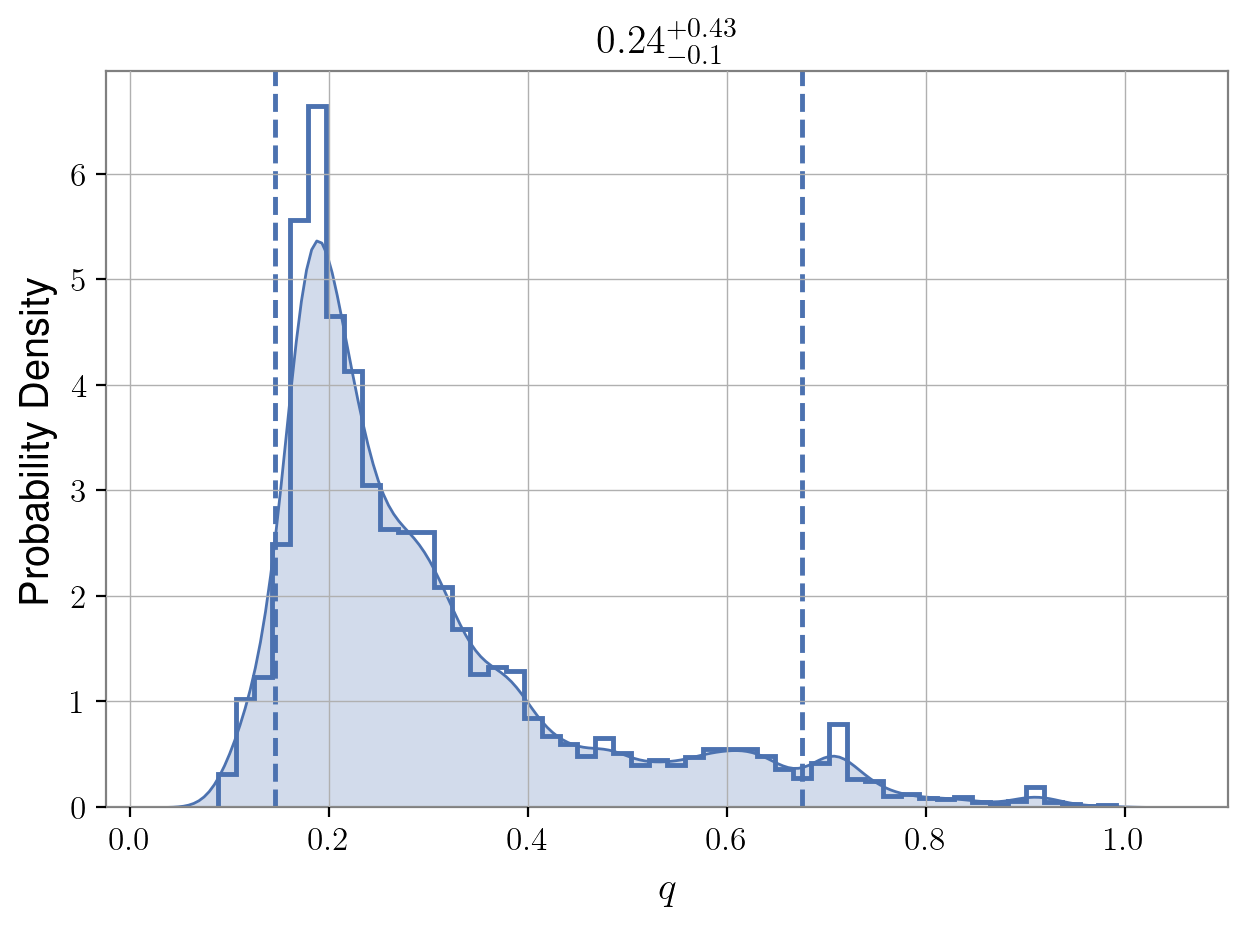

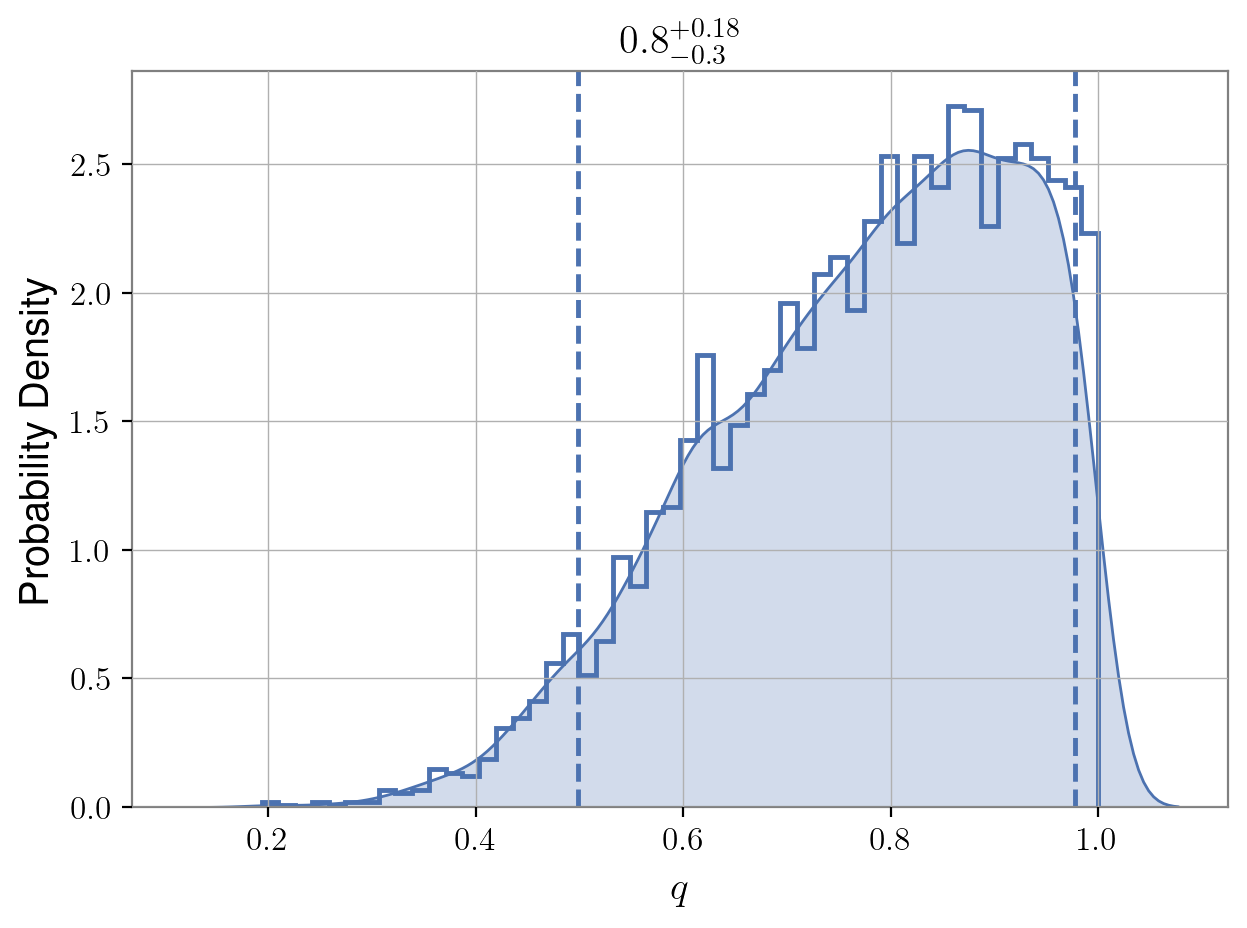

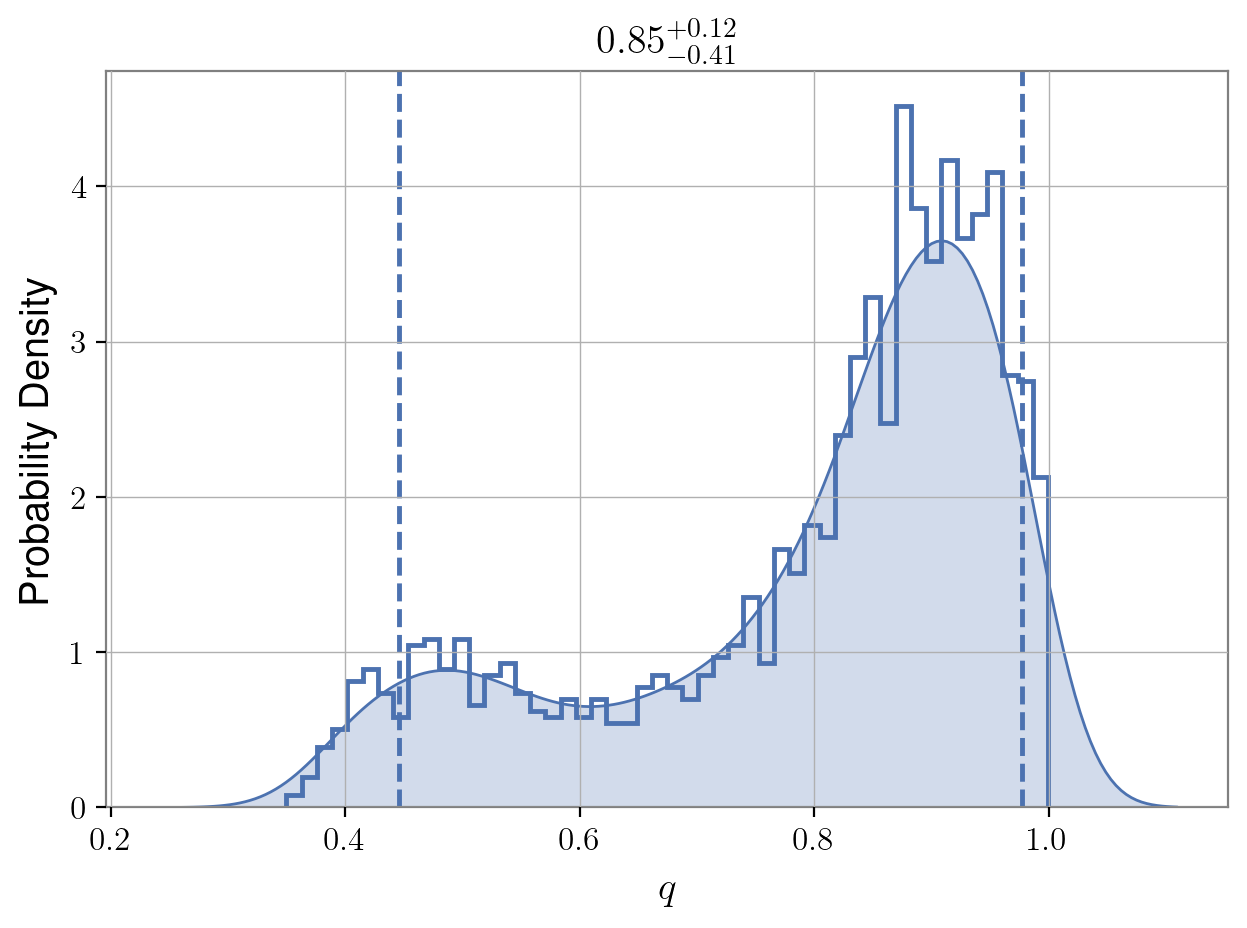

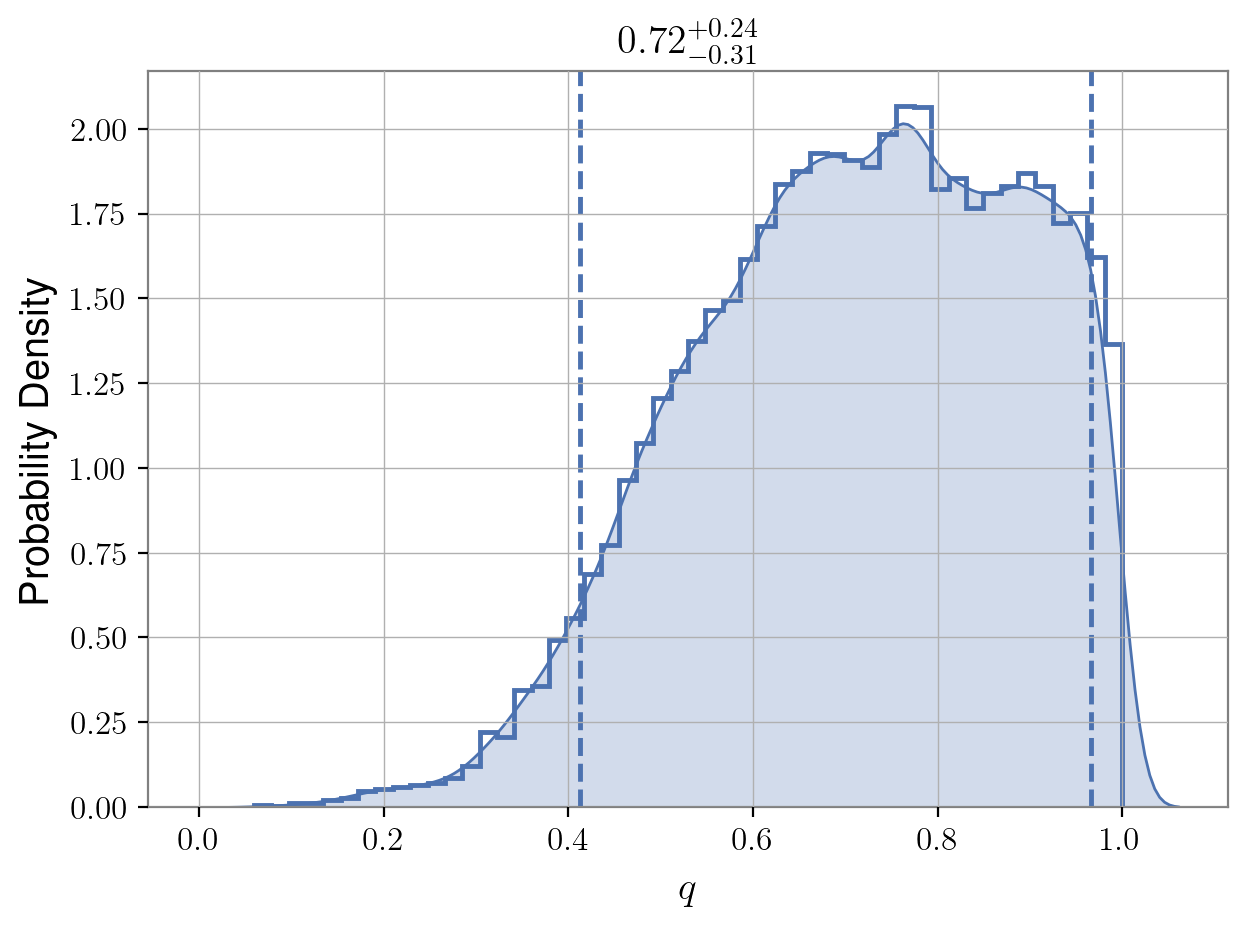

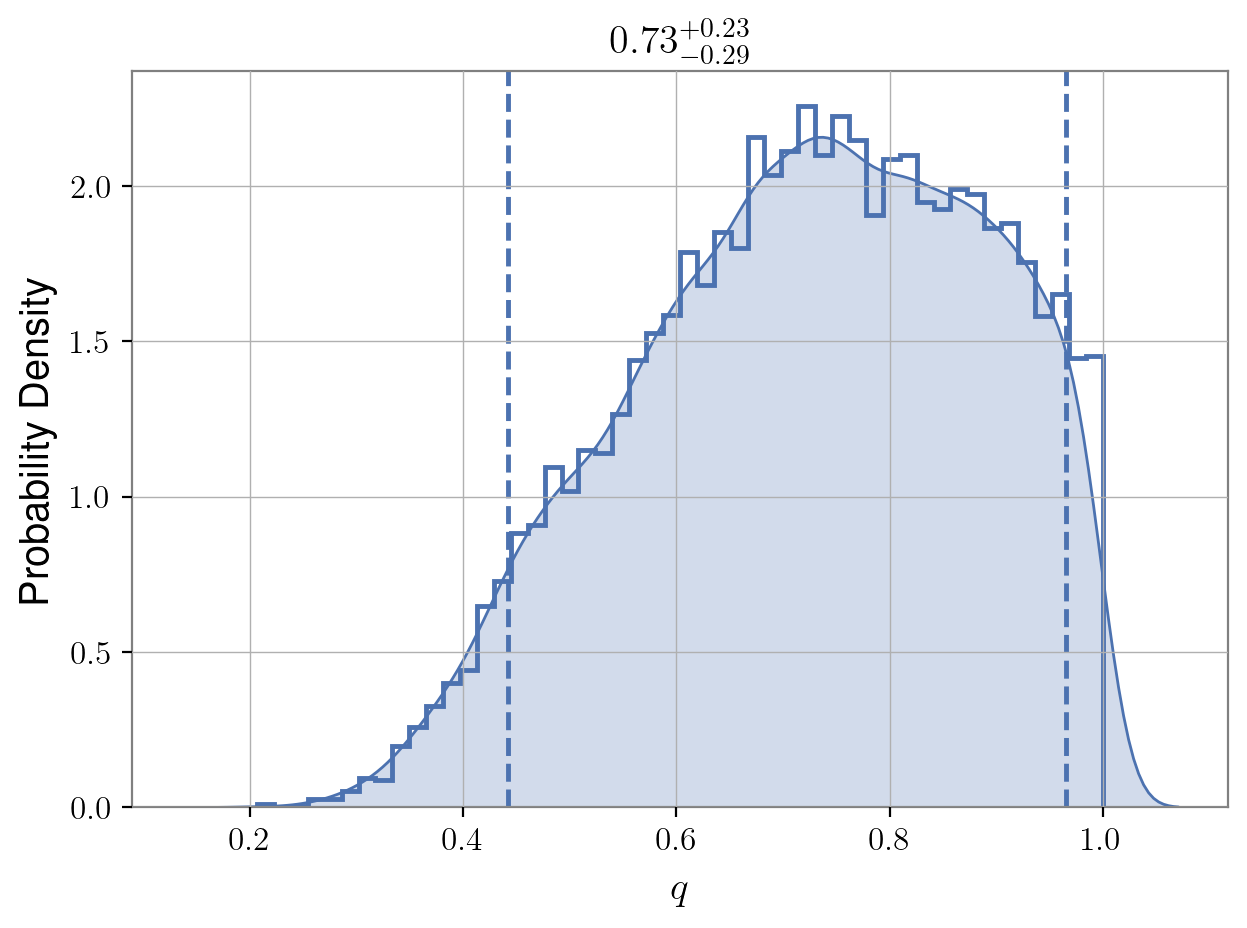

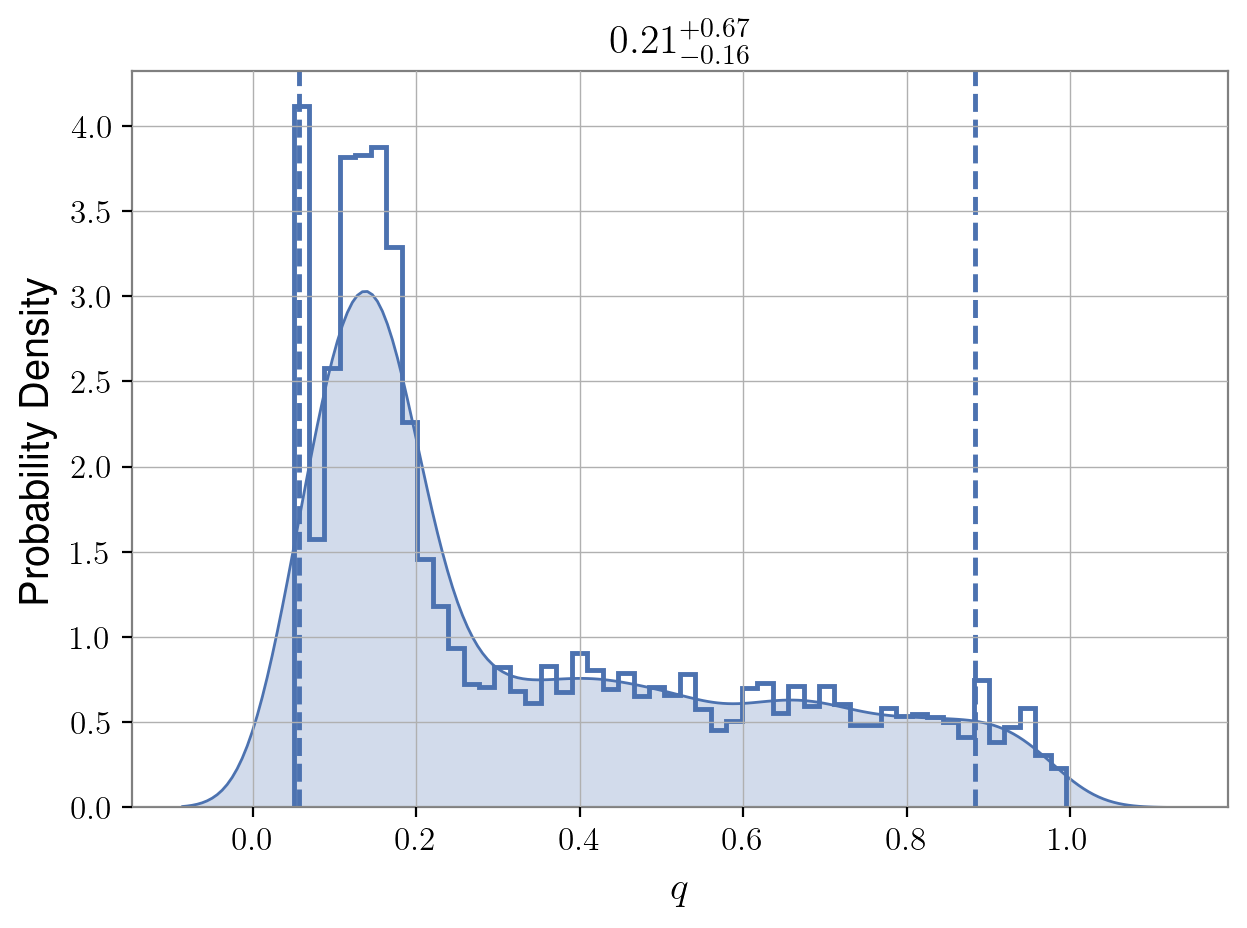

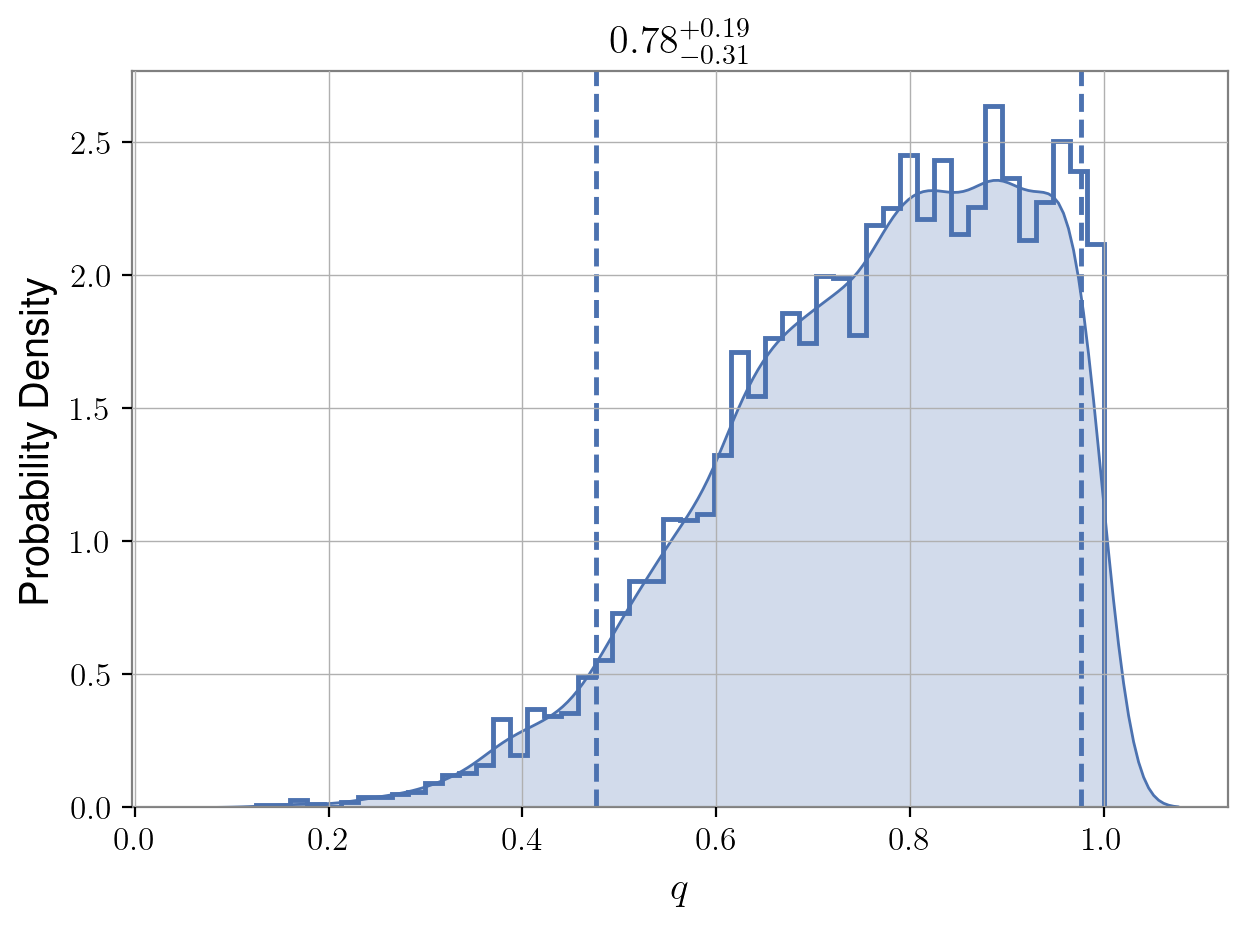

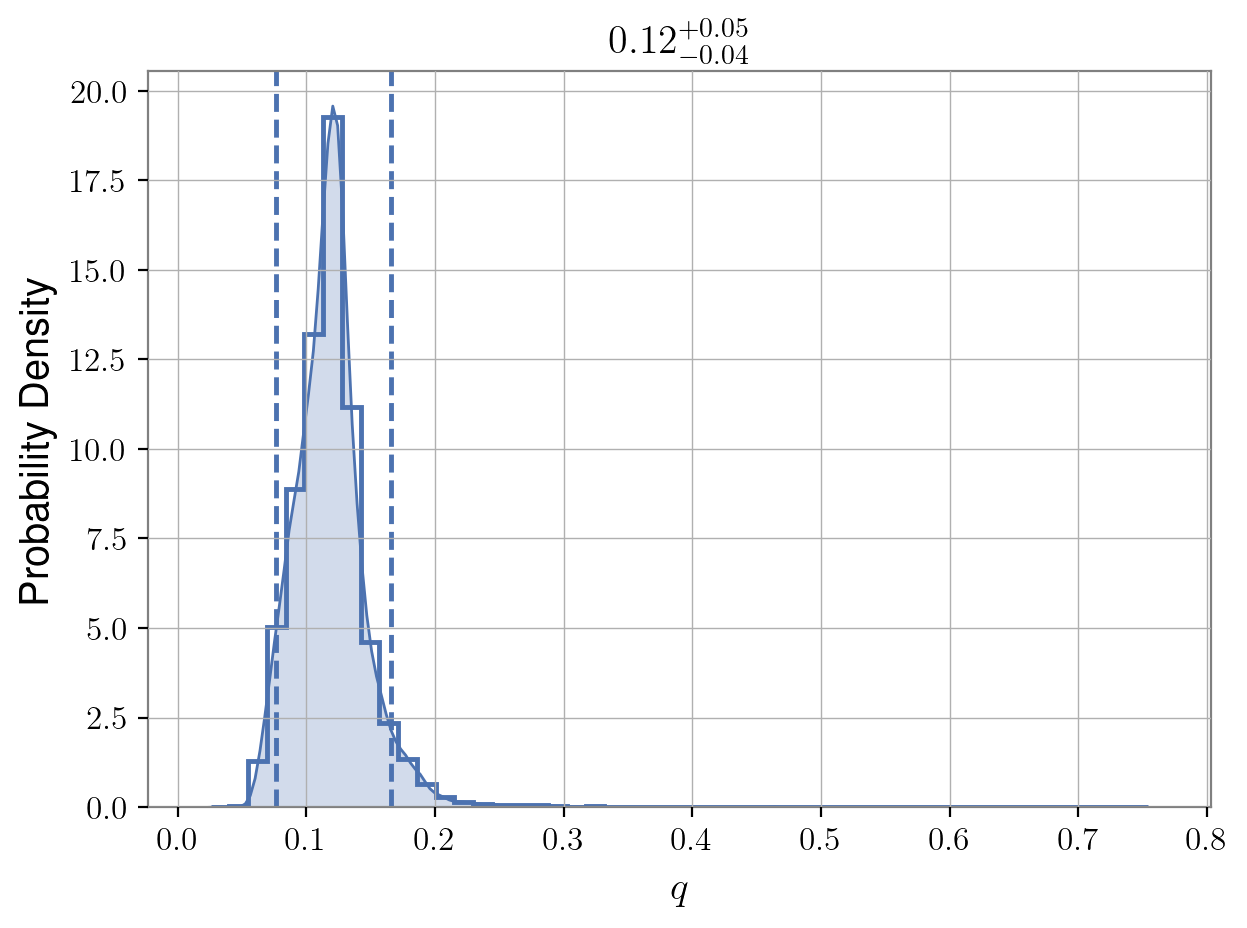

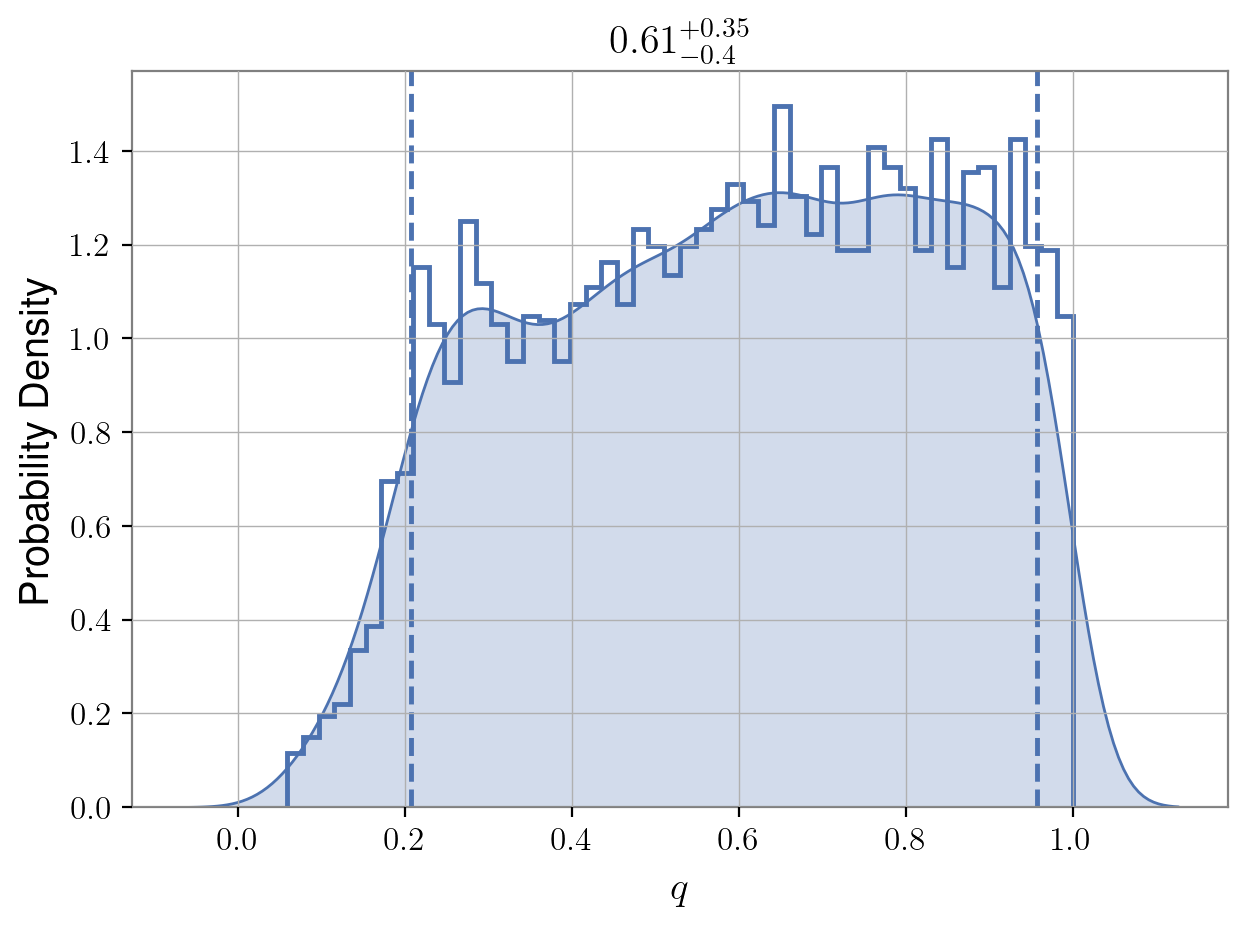

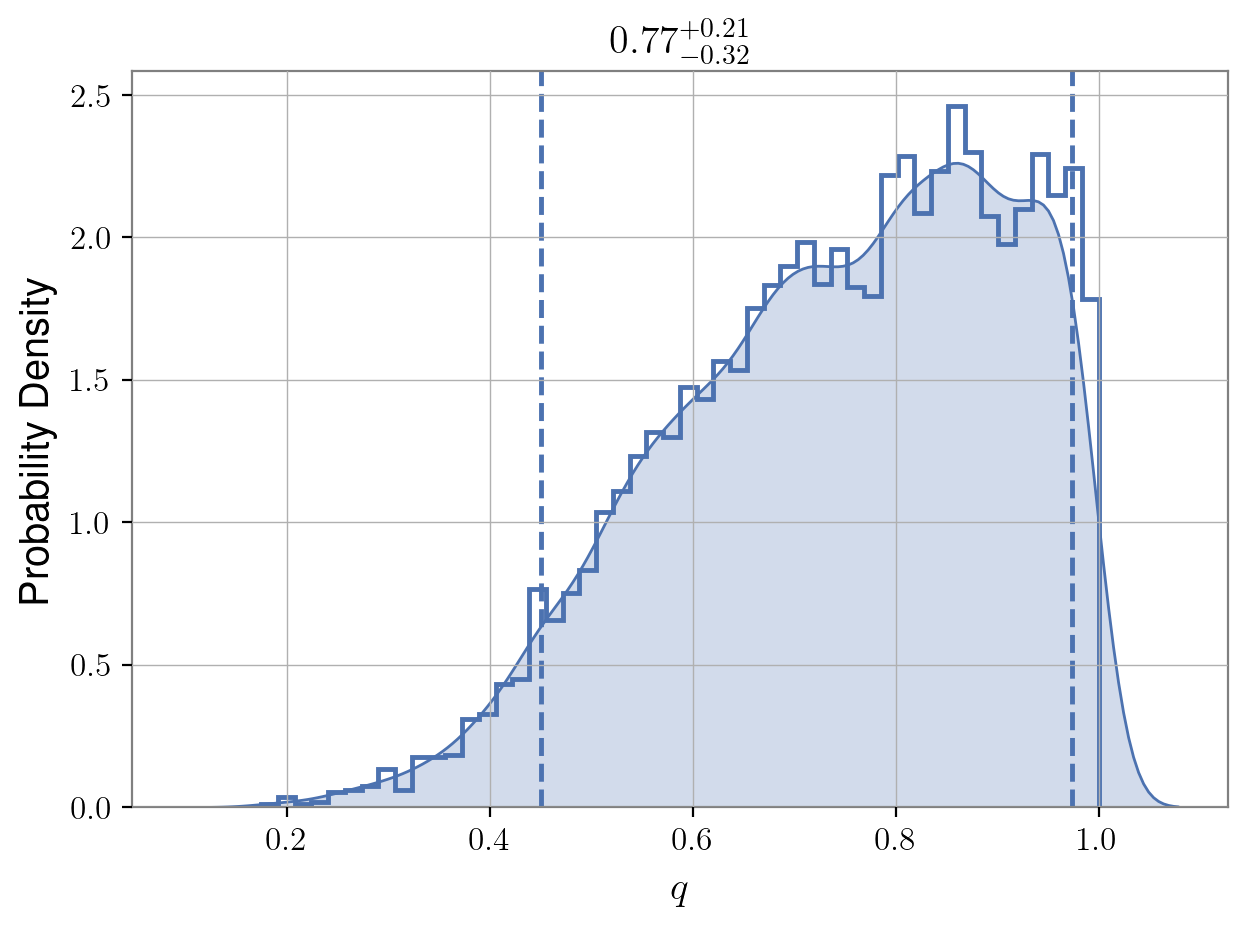

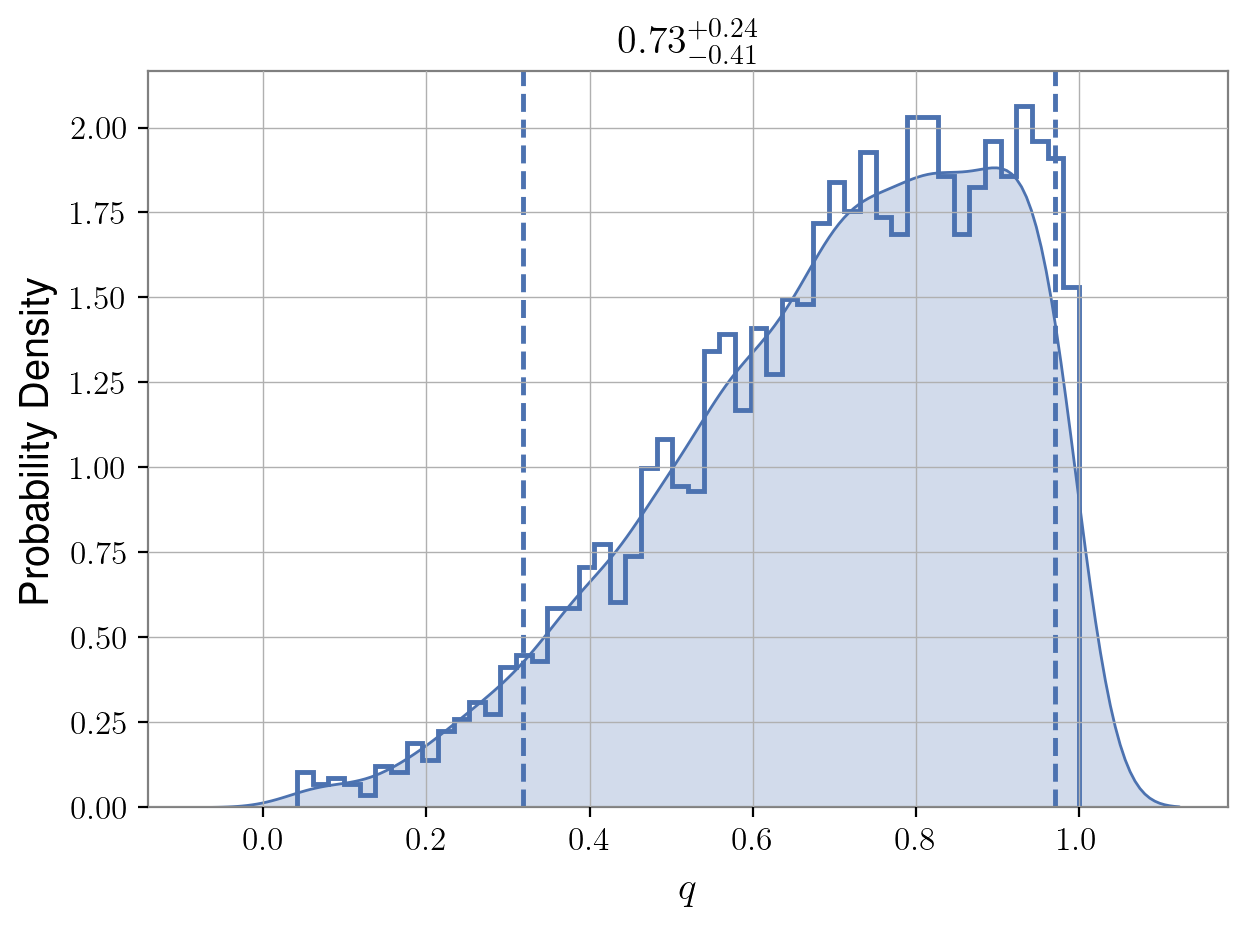

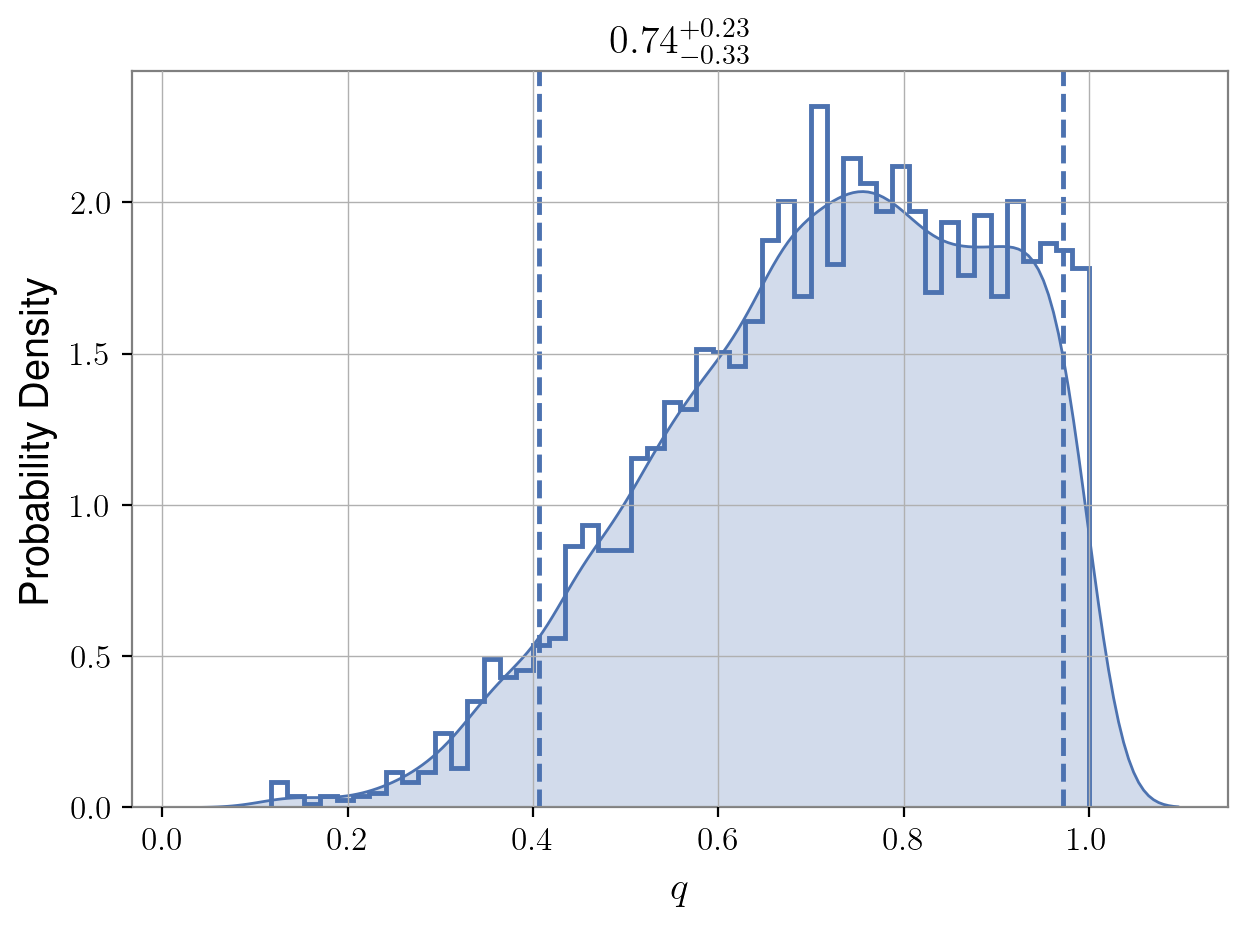

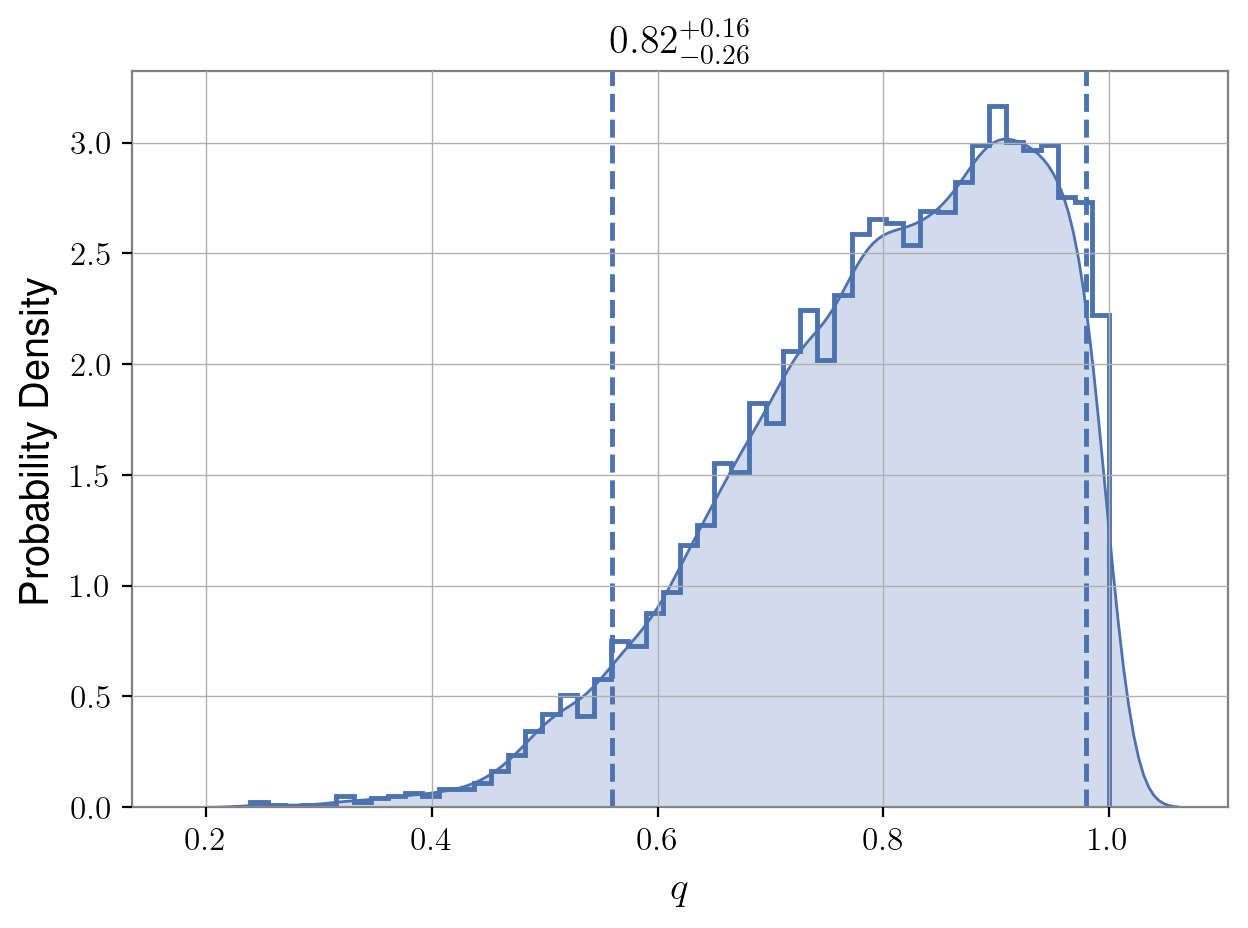

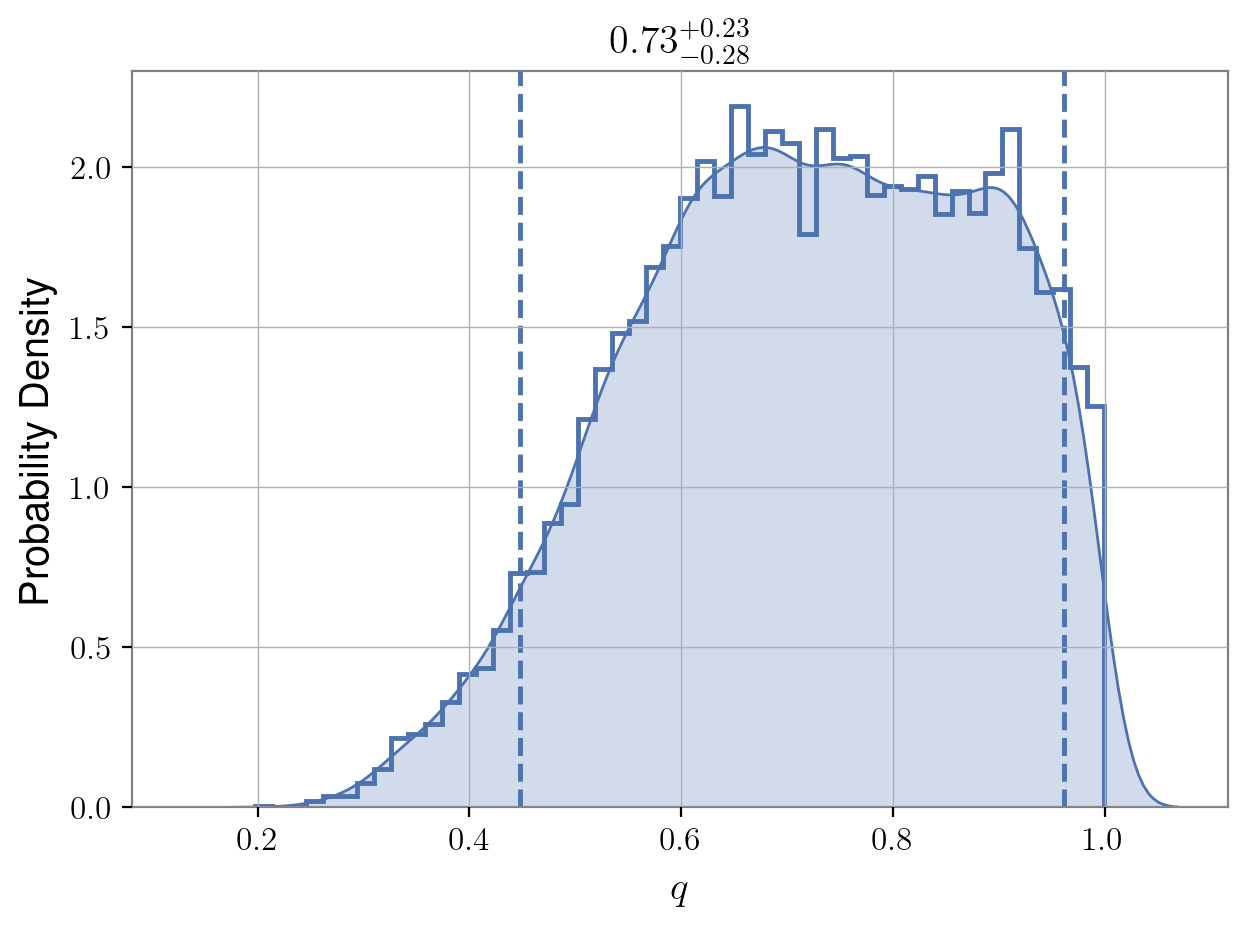

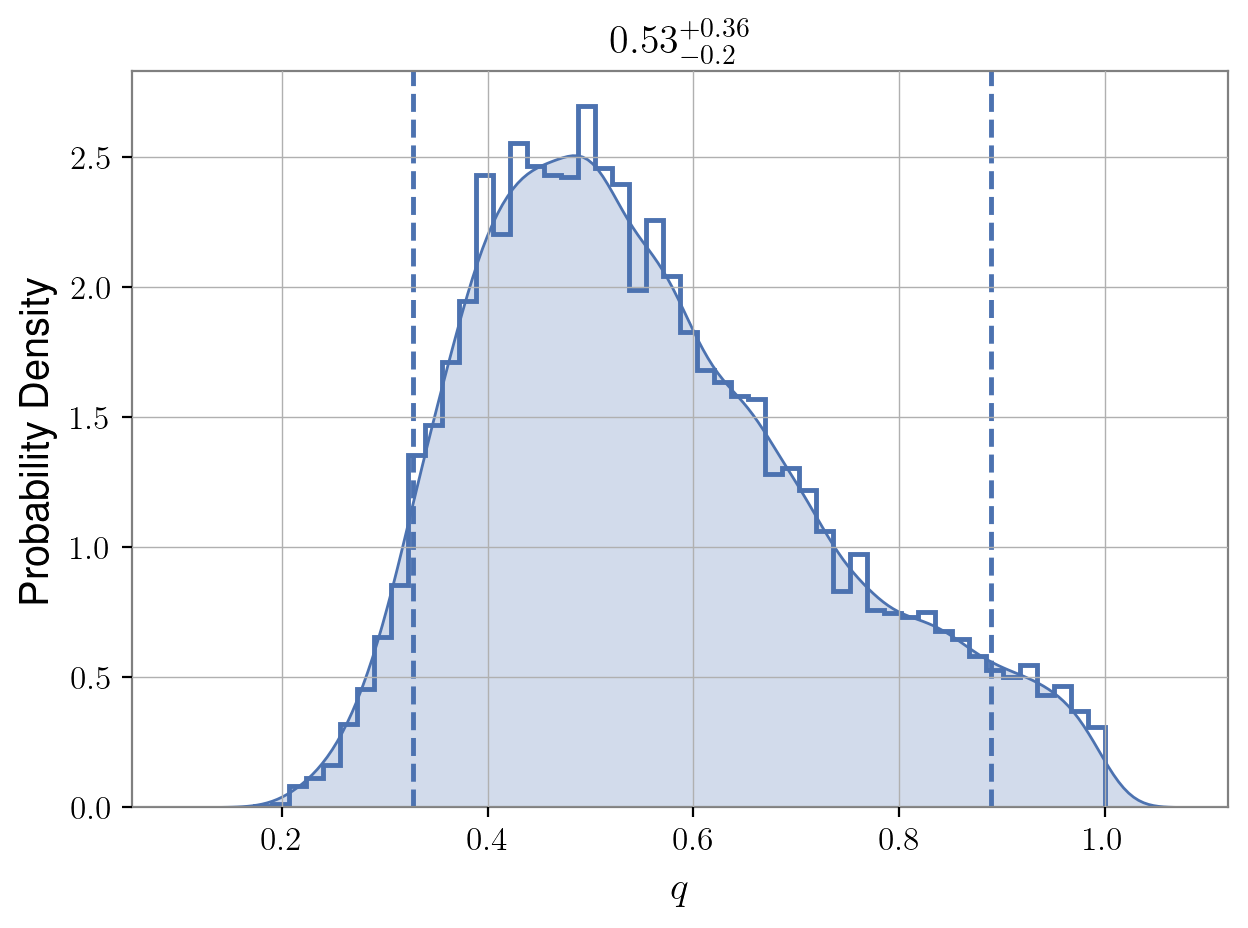

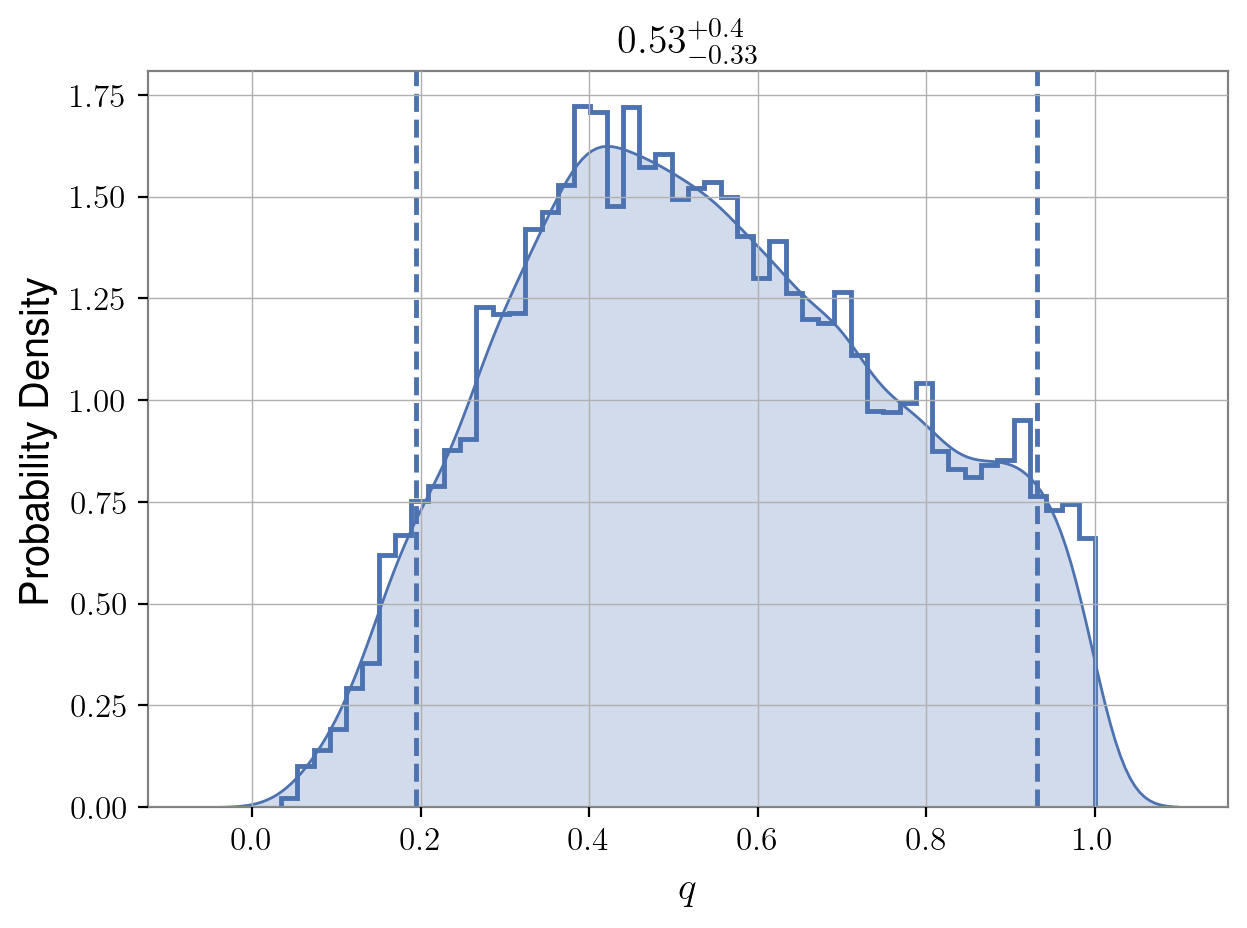

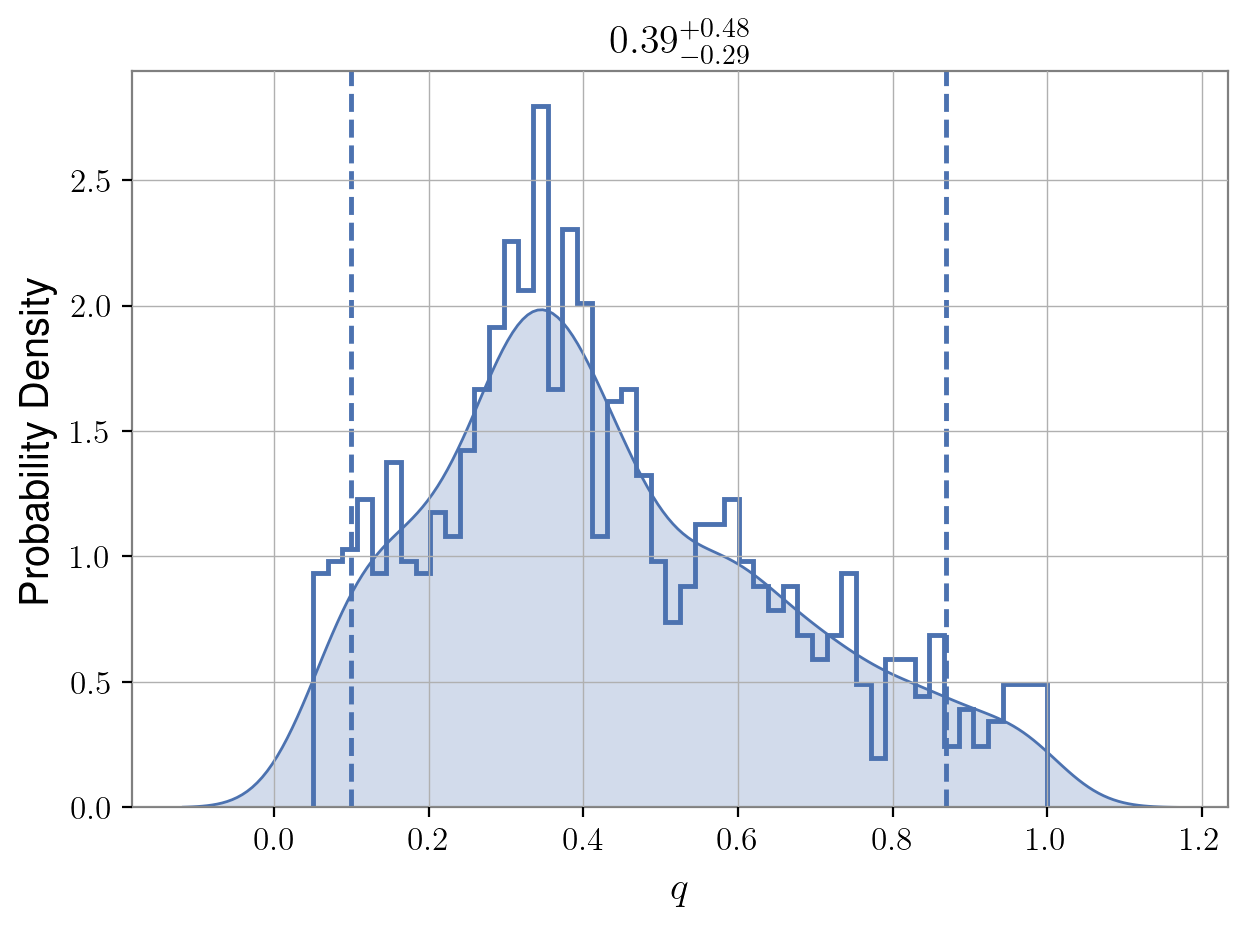

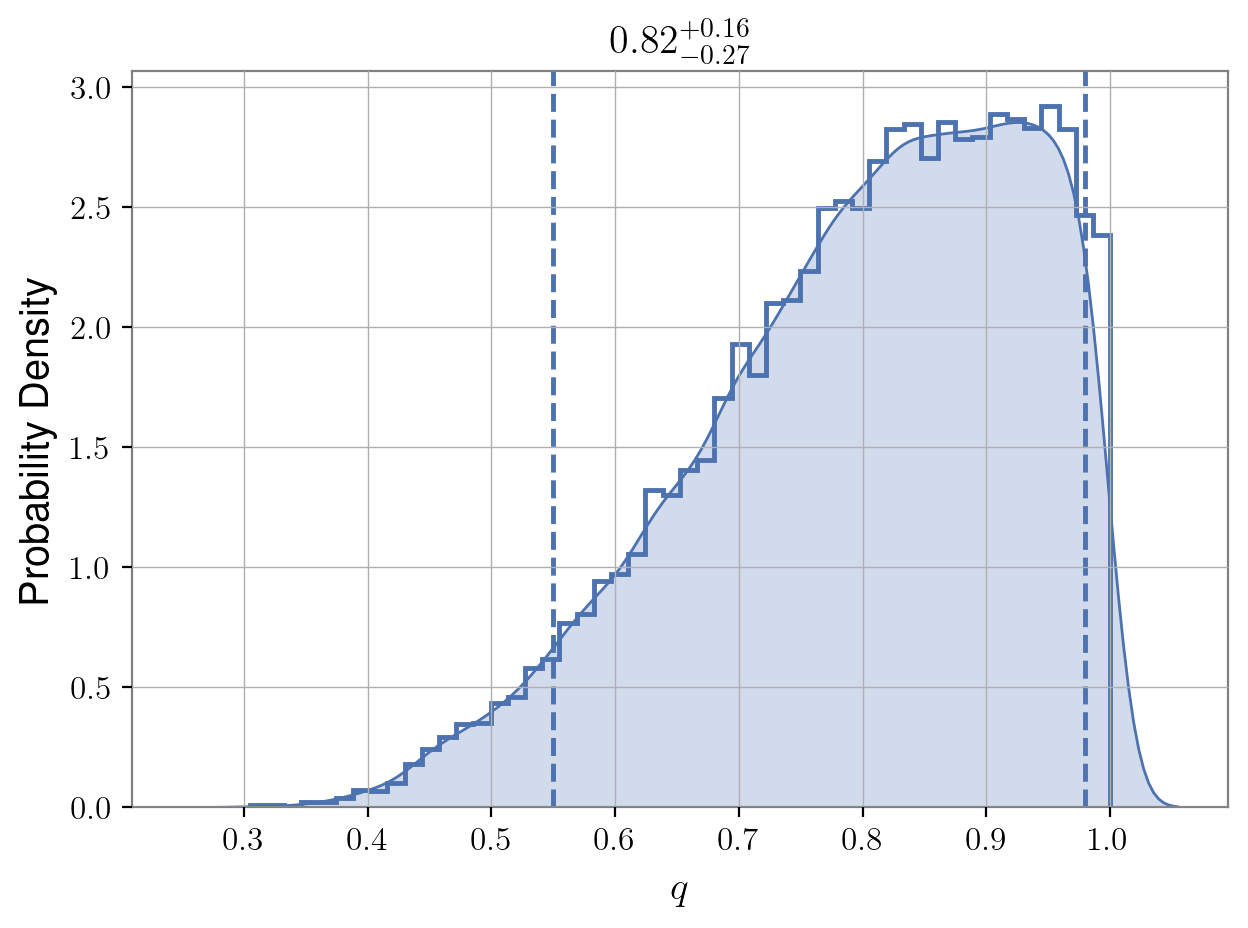

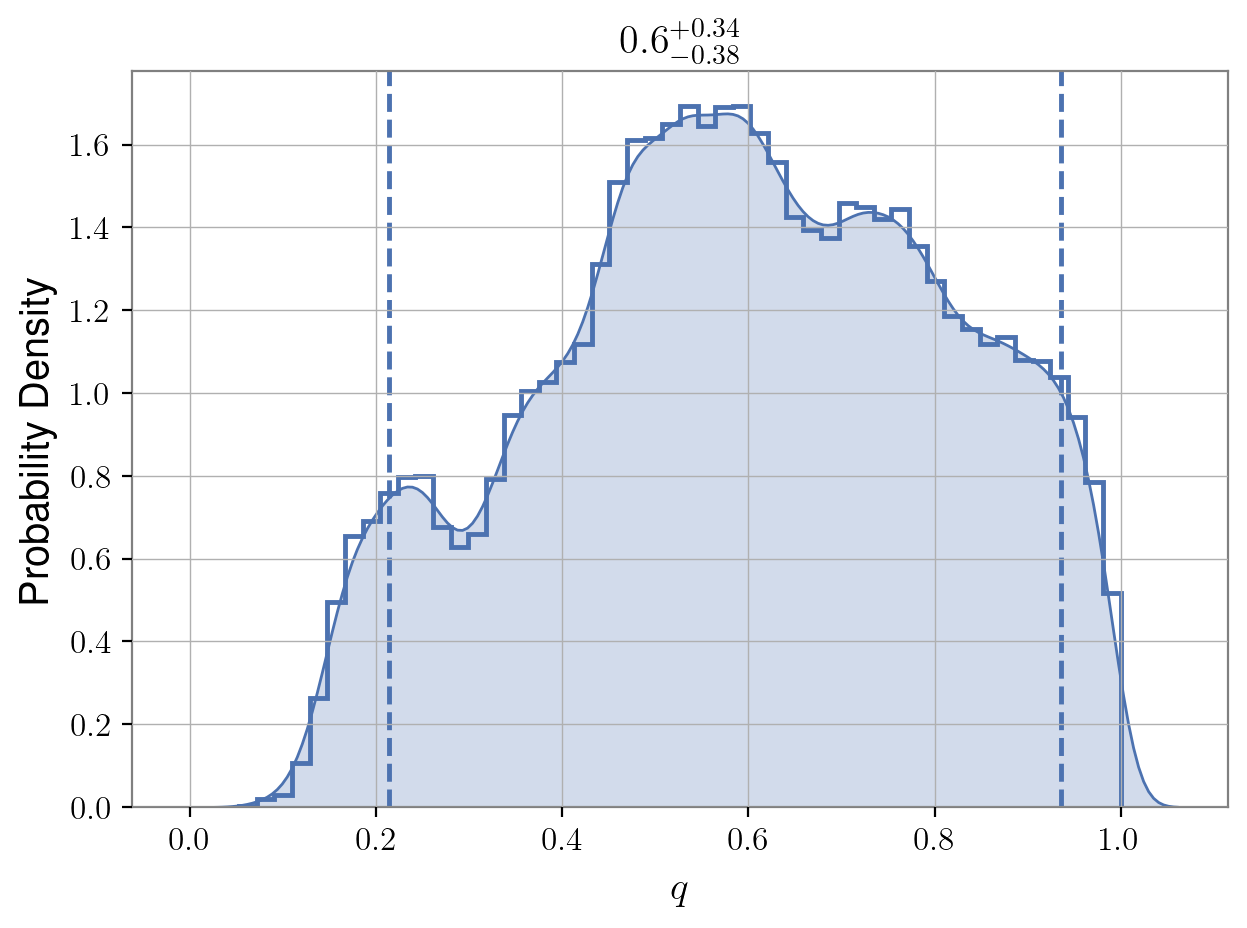

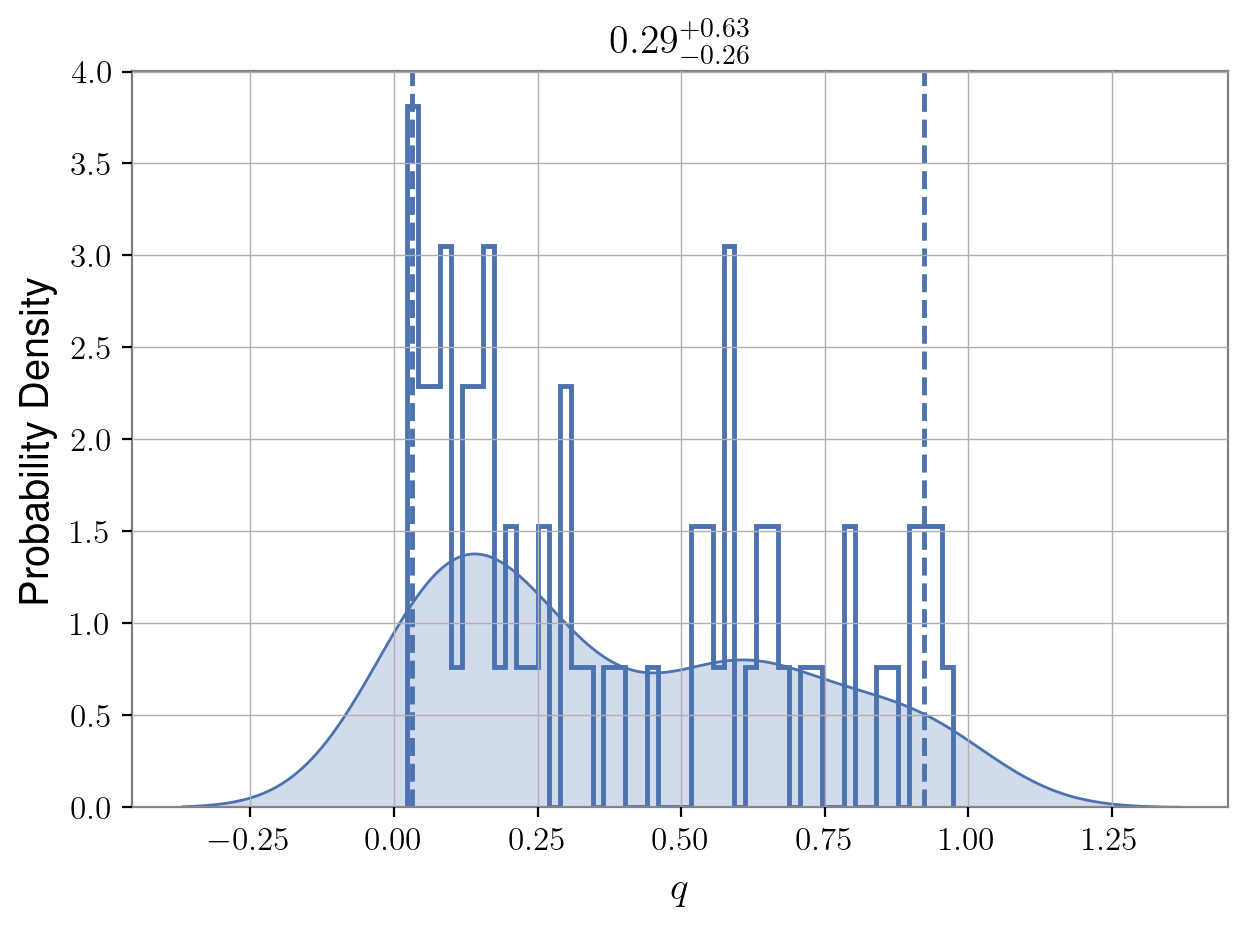

In [36]:
from pesummary.gw.fetch import fetch_open_samples
for e in events[-20:]:
    fetch_open_samples("{}".format(e[:-3]), unpack=False, read_file=False, delete_on_exit=False, outdir="./", verbose=True)

    # Get list of all files in the current directory
    files_in_directory = os.listdir('./')

    # Filter files that contain the substring
    matching_files = [file for file in files_in_directory if e[:-3] in file]

    with h5py.File(matching_files[0], "r") as f:
        print("H5 data sets:")
        print(list(f))
    data = read(matching_files[0])
    samples_dict = data.samples_dict
    posterior_samples = samples_dict["C01:Mixed"]
    fig = posterior_samples.plot("mass_ratio", type="hist", kde=True)


In [15]:
files_in_directory = os.listdir('./')
mz = []
m1 = []
q = []
snr = []
chi_p = []
chi_eff = []
a_1 = []
a_2 = []
from tqdm import tqdm 
# Filter files that contain the substring
matching_files = [file for file in files_in_directory if '.h5' in file]
for fx in tqdm(matching_files):
    with h5py.File(fx, "r") as f:
        try:
            snr.append(f["C01:IMRPhenomXPHM"]["posterior_samples"]['network_matched_filter_snr'])
            mz.append(f["C01:IMRPhenomXPHM"]["posterior_samples"]['chirp_mass'])
            q.append(f["C01:IMRPhenomXPHM"]["posterior_samples"]['mass_ratio'])
            m1.append(f["C01:IMRPhenomXPHM"]["posterior_samples"]['mass_1'])
            chi_p.append(f["C01:IMRPhenomXPHM"]["posterior_samples"]['chi_p'])
            chi_eff.append(f["C01:IMRPhenomXPHM"]["posterior_samples"]['chi_eff'])
            a_1.append(f["C01:IMRPhenomXPHM"]["posterior_samples"]['a_1'])
            a_2.append(f["C01:IMRPhenomXPHM"]["posterior_samples"]['a_2'])
            
        except:
            print(fx)

  0%|          | 0/84 [00:00<?, ?it/s]

'IGWN-GWTC2p1-v1-GW190916_200658_PEDataRelease.h5'

 12%|█▏        | 10/84 [00:07<00:42,  1.74it/s]

'tmpii1htsn3_IGWN-GWTC2p1-v1-GW190403_051519_PEDataRelease.h5'

 17%|█▋        | 14/84 [00:10<00:57,  1.21it/s]

'IGWN-GWTC2p1-v2-GW190425_081805_PEDataRelease_mixed_cosmo.h5'

 23%|██▎       | 19/84 [00:16<01:03,  1.02it/s]

'tmpwr4fze48_IGWN-GWTC2p1-v1-GW190403_051519_PEDataRelease.h5'

 26%|██▌       | 22/84 [00:21<01:30,  1.45s/it]

'IGWN-GWTC3p0-v1-GW200115_042309_PEDataRelease_mixed_cosmo.h5'

 29%|██▊       | 24/84 [00:25<01:37,  1.63s/it]

'IGWN-GWTC3p0-v1-GW200105_162426_PEDataRelease_mixed_cosmo.h5'

 37%|███▋      | 31/84 [00:37<01:41,  1.92s/it]

'IGWN-GWTC2p1-v1-GW190426_190642_PEDataRelease.h5'

 62%|██████▏   | 52/84 [01:28<01:17,  2.42s/it]

'IGWN-GWTC2p1-v1-GW190403_051519_PEDataRelease.h5'

 65%|██████▌   | 55/84 [01:38<01:19,  2.74s/it]

'IGWN-GWTC2p1-v1-GW190925_232845_PEDataRelease.h5'

 74%|███████▍  | 62/84 [01:50<00:48,  2.22s/it]

'IGWN-GWTC2p1-v1-GW190805_211137_PEDataRelease.h5'

 81%|████████  | 68/84 [01:53<00:16,  1.02s/it]

'IGWN-GWTC2p1-v1-GW190725_174728_PEDataRelease.h5'

 85%|████████▍ | 71/84 [01:59<00:22,  1.74s/it]

'IGWN-GWTC3p0-v1-GW191219_163120_PEDataRelease_mixed_cosmo.h5'

 94%|█████████▍| 79/84 [02:09<00:06,  1.23s/it]

'IGWN-GWTC2p1-v1-GW190917_114630_PEDataRelease.h5'

 98%|█████████▊| 82/84 [02:13<00:03,  1.52s/it]

'IGWN-GWTC2p1-v1-GW190926_050336_PEDataRelease.h5'

100%|██████████| 84/84 [02:16<00:00,  1.62s/it]


In [17]:
np.savez('./{}o3aeventPE.npz'.format(len(q)), q=np.array(q), snr = np.array(snr), m1 = np.array(m1), mz = np.array(mz), chi_p = np.array(chi_p), chi_eff = np.array(chi_eff), a_1 = np.array(a_1), a_2 = np.array(a_2))

/tmp/ipykernel_3699433/2530667570.py:1: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  np.savez('./70o3aeventPE.npz', q=np.array(q), snr = np.array(snr), m1 = np.array(m1), mz = np.array(mz), chi_p = np.array(chi_p), chi_eff = np.array(chi_eff), a_1 = np.array(a_1), a_2 = np.array(a_2))
